In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip gdrive/My\ Drive/data-science-bowl-2018.zip

Archive:  gdrive/My Drive/data-science-bowl-2018.zip
   creating: data-science-bowl-2018-2/
   creating: data-science-bowl-2018-2/test/
   creating: data-science-bowl-2018-2/test/inputs/
 extracting: data-science-bowl-2018-2/test/inputs/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png  
 extracting: data-science-bowl-2018-2/test/inputs/0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275.png  
 extracting: data-science-bowl-2018-2/test/inputs/06350c7cc618be442c15706db7a68e91f313758d224de4608f9b960106d4f9ca.png  
 extracting: data-science-bowl-2018-2/test/inputs/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c.png  
  inflating: data-science-bowl-2018-2/test/inputs/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f.png  
  inflating: data-science-bowl-2018-2/test/inputs/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1.png  
  inflating: data-science-bowl-2018-2/test/inputs/10328b822b836e67b547b4144e0b7eb43747c

In [3]:
!pip install git+https://github.com/tensorflow/examples.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-k__5x36b
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-k__5x36b
  Resolved https://github.com/tensorflow/examples.git to commit 1c1d108deea5519de0c6b1c69242b8512b36a086
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-1c1d108deea5519de0c6b1c69242b8512b36a086_-py3-none-any.whl size=299719 sha256=ae4c60a737f0fecbe2fedbd9522cc11282135f21d8a050abd1e533959267913a
  Stored in directory: /tmp/pip-ephem-wheel-cache-g7w_v_u6/wheels/4e/f5/c2/bfe75b834c9028b2529023bf74541c46ead531b513a8010d21
Failed to build tensorflow-examples
  Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel c

In [4]:
#1. Import packages
from tensorflow_examples.models.pix2pix import pix2pix
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from keras.utils import plot_model
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2,os

In [5]:
#2. Data Preparation
#2.1 Prepare the path
root_path = '/content/data-science-bowl-2018-2/train'

In [6]:
#2.2 Prepare empty list to hold the data
images = []
masks = []

#2.3 Load the images using opencv
image_dir = os.path.join(root_path,'inputs')
for image_file in os.listdir(image_dir):
    img = cv2.imread(os.path.join(image_dir,image_file))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(128,128))
    images.append(img)

#2.4 Load the masks 
masks_dir = os.path.join(root_path,'masks')
for mask_file in os.listdir(masks_dir):
    mask = cv2.imread(os.path.join(masks_dir,mask_file),cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask,(128,128))
    masks.append(mask)

In [7]:
#2.5 Convert the list of np array into a np array
images_np = np.array(images)
masks_np = np.array(masks)

In [8]:
#3. Data preprocessing
#3.1 Expand the mask dimension
masks_np_exp = np.expand_dims(masks_np,axis=-1)
#Check the mask output
print(np.unique(masks_np_exp[0]))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  19
  20  21  22  23  24  25  26  29  30  31  33  34  36  38  40  41  42  44
  46  47  49  52  54  55  56  58  60  61  62  63  64  68  69  71  72  73
  74  77  78  79  80  81  85  86  87  88  89  90  93  94  97  99 100 101
 103 104 106 108 109 110 112 114 116 119 120 123 124 127 128 131 132 135
 137 141 143 146 147 149 151 152 154 155 156 157 158 161 162 165 166 167
 168 170 174 175 176 178 180 181 183 184 185 186 187 190 191 193 194 197
 199 201 203 204 206 208 209 212 213 214 215 216 217 219 221 222 224 225
 226 229 230 231 232 233 234 235 236 238 239 241 242 243 244 245 246 247
 248 250 251 252 253 254 255]


In [9]:
#3.2 Convert the mask values from [0,255] into [0,1]
converted_masks = np.round(masks_np_exp / 255.0).astype(np.int64)
#Check the mask output
print(np.unique(converted_masks[0]))

[0 1]


In [10]:
#3.3 Normalize the images
converted_images = images_np/255.0

In [11]:
#4. Perform train test split
SEED = 42
X_train,X_test,y_train,y_test = train_test_split(converted_images,converted_masks,test_size=0.2,random_state=SEED)

In [12]:
#5. Convert the numpy arrays into tensor slices
X_train_tensor = tf.data.Dataset.from_tensor_slices(X_train)
X_test_tensor = tf.data.Dataset.from_tensor_slices(X_test)
y_train_tensor = tf.data.Dataset.from_tensor_slices(y_train)
y_test_tensor = tf.data.Dataset.from_tensor_slices(y_test)

In [13]:
#6. Combine the images and masks using the zip method
train_dataset = tf.data.Dataset.zip((X_train_tensor,y_train_tensor))
test_dataset = tf.data.Dataset.zip((X_test_tensor,y_test_tensor))

In [14]:
#7. Define data augmentation pipeline as a single layer through subclassing
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels

#7.1 Build the dataset
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE
BUFFER_SIZE = 1000
TRAIN_SIZE = len(train_dataset)
STEPS_PER_EPOCH = TRAIN_SIZE//BATCH_SIZE

train_batches = (
    train_dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

test_batches = test_dataset.batch(BATCH_SIZE)

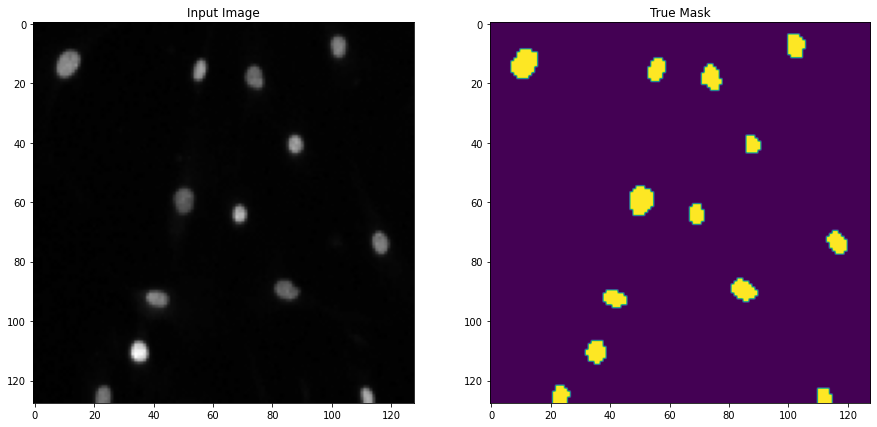

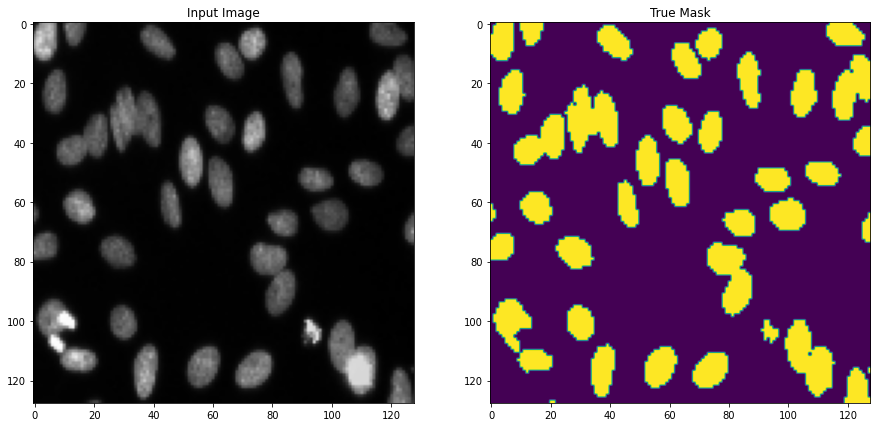

In [15]:
#8. Visualize some pictures as example
def display(display_list):
    plt.figure(figsize=(15,15))
    title = ['Input Image','True Mask','Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1,len(display_list),i+1)
        plt.title(title[i])
        plt.imshow(keras.utils.array_to_img(display_list[i]))
    plt.show()

for images,masks in train_batches.take(2):
    sample_image,sample_mask = images[0],masks[0]
    display([sample_image,sample_mask])

In [16]:
#9. Model development
#9.1. Use a pretrained model as the feature extractor
base_model = keras.applications.MobileNetV2(input_shape=[128,128,3],include_top=False)
base_model.summary()
#9.2. Use these activation layers as the outputs from the feature extractor (some of these outputs will be used to perform concatenation at the upsampling path)
layer_names = [
    'block_1_expand_relu',      #64x64
    'block_3_expand_relu',      #32x32
    'block_6_expand_relu',      #16x16
    'block_13_expand_relu',     #8x8
    'block_16_project'          #4x4
    ]

base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

#9.3. Instantiate the feature extractor
down_stack = keras.Model(inputs=base_model.input,outputs=base_model_outputs)
down_stack.trainable = False

#9.4. Define the upsampling path
up_stack = [
    pix2pix.upsample(512,3),    #4x4 --> 8x8
    pix2pix.upsample(256,3),    #8x8 --> 16x16
    pix2pix.upsample(128,3),    #16x16 --> 32x32
    pix2pix.upsample(64,3)      #32x32 --> 64x64
]

#9.5. Use functional API to construct the entire U-net

def unet(output_channels:int):
    inputs = keras.layers.Input(shape=[128,128,3])
    #Downsample through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

    #Build the upsampling path and establish the concatenation
    for up, skip in zip(up_stack,skips):
        x = up(x)
        concat = keras.layers.Concatenate()
        x = concat([x,skip])
    
    #Use a transpose convolution layer to perform the last upsampling, this will become the output layer
    last = keras.layers.Conv2DTranspose(filters=output_channels,kernel_size=3,  strides=2,padding='same') #64x64 --> 128x128
    outputs = last(x)

    model = keras.Model(inputs=inputs,outputs=outputs)

    return model

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 64, 64, 96)  1841984     ['input_2[0][0]']                
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
                                ),                                                          

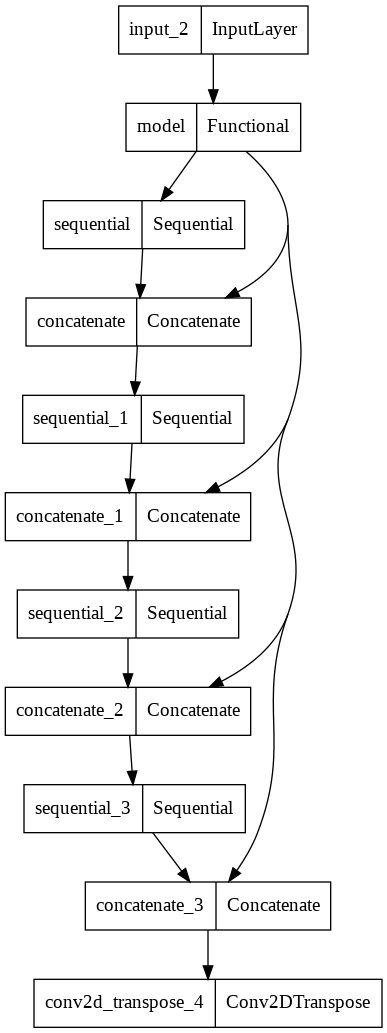

In [18]:
#9.6. Use the function to create the model
OUTPUT_CHANNELS = 3
model = unet(OUTPUT_CHANNELS)
model.summary()
keras.utils.plot_model(model)

In [19]:
#10. Compile the model
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

1/1 [==============================] - 1s 1s/step


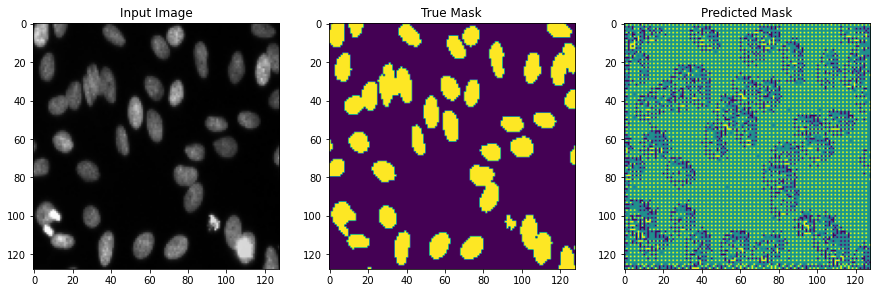

In [20]:
#11. Create functions to show predictions
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask,axis=-1)
    pred_mask = pred_mask[...,tf.newaxis]
    return pred_mask[0]

def show_predictions(dataset=None,num=1):
    if dataset:
        for image,mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0],mask[0],create_mask(pred_mask)])
    else:
        display([sample_image,sample_mask,create_mask(model.predict(sample_image[tf.newaxis,...]))])

show_predictions()

In [21]:
#12. Create a callback function to make use of the show_predictions function
class DisplayCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        clear_output(wait=True)
        show_predictions()
        print('\nSample prediction after epoch {}\n'.format(epoch+1))

1/1 [==============================] - 0s 66ms/step


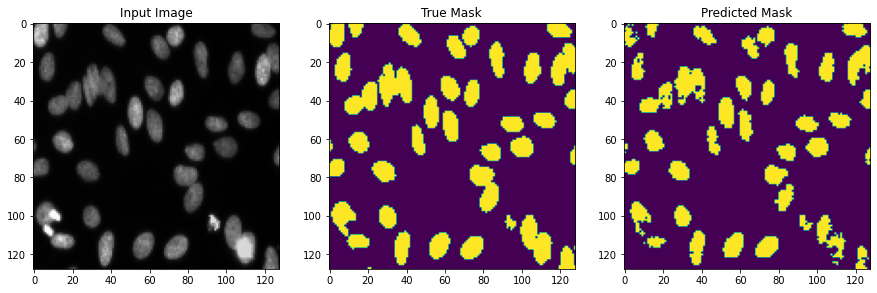


Sample prediction after epoch 5

30/30 [==============================] - 41s 1s/step - loss: 0.1149 - accuracy: 0.9530 - val_loss: 0.0847 - val_accuracy: 0.9646


In [22]:
#13. Model training
EPOCHS = 5
VAL_SUBSPLITS = 5
TEST_SIZE = len(test_dataset)
VALIDATION_STEPS = TEST_SIZE // BATCH_SIZE // VAL_SUBSPLITS

history = model.fit(train_batches,validation_data=test_batches,validation_steps=VALIDATION_STEPS,epochs=EPOCHS,steps_per_epoch=STEPS_PER_EPOCH,callbacks=[DisplayCallback()])

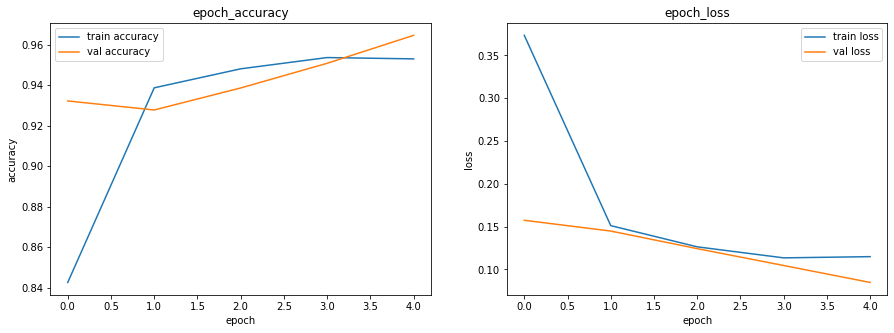

In [23]:
#Visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.title('epoch_accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.title('epoch_loss')
plt.legend()
plt.show()

In [24]:
#Evaluate the final model
test_loss,test_acc = model.evaluate(test_batches)
print("Loss = ",test_loss)
print("Accuracy = ",test_acc)

8/8 [==============================] - 6s 681ms/step - loss: 0.1120 - accuracy: 0.9506
Loss =  0.11203259974718094
Accuracy =  0.9505549669265747


1/1 [==============================] - 2s 2s/step


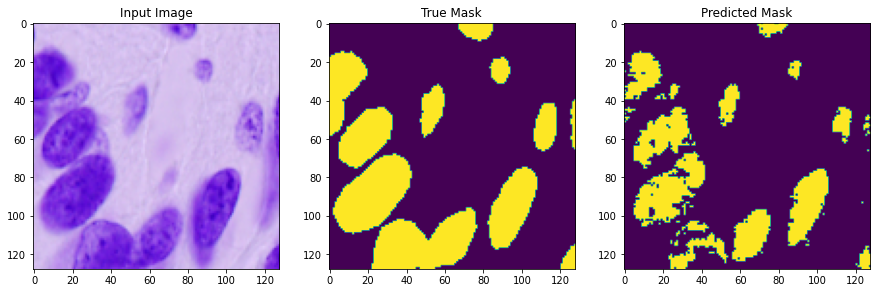

1/1 [==============================] - 1s 686ms/step


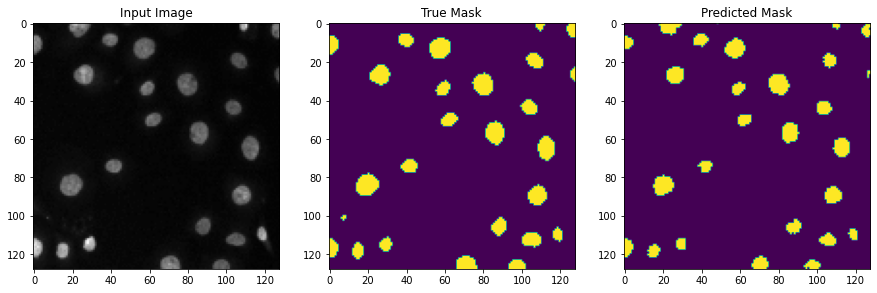

1/1 [==============================] - 1s 687ms/step


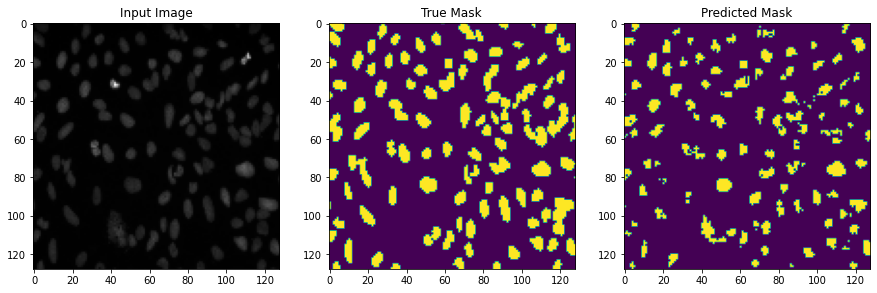

In [25]:
#14. Model deployment
show_predictions(test_batches,3)

In [26]:
#15. Model Saving
#to save trained model
model.save('model.h5')
